# Orders

Gran parte de nuestra tarea es crear "Features", variables en los datos que representan un aspecto del fenómeno que estudiamos y nos ayudan a explicarlo.

**Ejercicio**

Vamos a investigar la relación entre orders y el score.

La idea es crear un dataframe con las siguientes features:

| feature_name 	                | type 	| description 	                                                                                                                                         |
|:------------------------------|:---:	|:------------------------------------------------------------------------------------------------------------------------------------------------------|
| `order_id` 	                  | str 	| the id of the order 	                                                                                                                                 |
| `tiempo_de_espera` 	          | float 	| numero de días entre order_date y delivered_date 	                                                                                                    |
| `tiempo_de_espera_previsto` 	 | float 	| numero de días entre order_date y estimated_delivery_date 	                                                                                           |
| `real_vas_esperado` 	         | float 	| si la fecha de entrega real es posterior a la fecha de entrega estimada, devuelve el número de días entre las dos fechas; de lo contrario, devuelve 0 |
| `order_status` 	              | str 	| statusde la orden	                                                                                                                                    |
| `es_cinco_estrellas` 	        | int 	| 1 si tuvo cinco estrellas en la  review, 0 caso contrario 	                                                                                           |
| `es_una_estrella` 	           | int 	| 1 si tuvo una estrella, 0 caso contrario 	                                                                                                            |
| `review_score` 	              | int 	| from 1 to 5 	                                                                                                                                         |
| `numero_de_productos` 	       | int 	| numero de productos que contiene una orden	                                                                                                           |
| `numero_de_vendedores` 	      | int 	| numero de vendedores unicos                                                                                                                           |
| `precio` 	                    | float 	| total del precio pagado por el cliente                                                                                                                |
| `valor_transporte` 	          | float 	| el valor del freight pagado por el cliente 	                                                                                                          |
| `distancia_al_cliente` 	      | float 	| distancia en km entre cliente y vendedor 	                                                                                                  |
  
Queremos filtrar las ordenes no entregadas

___

## Metodología:

Vamos a crear dos notebooks una de testeo y otra para importar nuestro paquete preprocess.orders_data y de ahí ir elavorando los métodos.

1er Método: Load_data: Trae el dataset sin nulos de una ubicación ya prefijada.

___

###  Buenas Pracitcas


Las notebooks se pueden hacer muy largas y desordenadas.
- Codifique su lógica para que siempre se pueda ejecutar de arriba a abajo sin fallar (Celda --> Ejecutar todo)
- Nombre sus variables con lo que significa y para que otra persona pueda entenderlo.
- Use nombres como `tmp` o `_` para pasos intermedios si sabe que no va a usarlos mucho tiempo
- Borre su código y combine celdas cuando sea relevante para minimizar el tamaño del Notebook (`Shift-M`)
- Oculte la salida de su celda si ya no necesita verla (haga doble clic en la sección roja `Out[]:` a la izquierda de su celda).
- Utilice la Structure de pycharm o Juypter lab para organizarse
- Shortcuts
    - `a` para insertar una celda arriba
    - `b` para insertar una celda debajo
    - `dd` para borrar una celda
    - `esc` y `flechas` para moverse entre celdas
    - `Shift-Enter` para ejecutar la celda y mover el foco a la siguiente
    - `Shift + Tab` cuando entre paréntesis de método, p. ¡`groupby()` para obtener los documentos! Repita varias veces para abrirlo permanentemente

In [1]:
%load_ext autoreload
%autoreload 2   

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
# Import orders data
from olist.load_data import load_all_data
data = load_all_data("/Users/lolonastri/Desktop/POO_UCEMA/trabajos_practicos/tp_datos/2-ecommerce/data")

In [4]:
data.keys()

dict_keys(['sellers', 'product_category_name_translation', 'orders', 'order_items', 'tablon_primario', 'customers', 'geolocation', 'order_payments', 'order_reviews', 'products'])

In [5]:
orders = data['orders'].copy() # buena practica para estar seguro que no modificas tu dataset original

___

## 1. Crear orders.py

### a) `tiempo_de_espera`
    Armar un dataframe que tenga
           order_id, tiempo_de_espera, tiempo_de_espera_previsto, real_vs_esperado, status_de_la_orden


# Pasos a seguir

> 1. Explora el dataframe `orders`
2. Filtra por `delivered orders`
3. Manipulá correctamente `datetime` (recordá el examen)
    - Repasá[`datetime`](https://docs.python.org/3/library/datetime.html)
    - Métodos para pasar "string" type a "pandas.datetime'  [`pandas.to_datetime()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)
4. Crea la columna `tiempo_de_espera`
5. Crea la columna  `tiempo_de_espera_previsto`
6. Crea la columna  `real_vs_esperado`
7. Chequea el nuevo dataset
8. Una vez terminado el código pasalo a tu librería `order.py`

Tanto para `tiempo_de_espera` como para `tiempo_de_espera_previsto`, debe restar las fechas/marcas de tiempo relevantes para obtener la diferencia horaria entre los objetos `pandas.datetime`. Luego, puede usar [`datetime.timedelta()`](https://docs.python.org/3/library/datetime.html#timedelta-objects) o [`np.timedelta64()`](https ://numpy.org/doc/stable/reference/arrays.datetime.html#datetime-and-timedelta-arithmetic) para averiguar cuántos días representa esa resta.


In [6]:
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [7]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [8]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [9]:
columnas_a_transformar = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

In [10]:
# Transforma a datetime
from olist.preprocess import transformar_columnas_datetime
orders_con_datetime = transformar_columnas_datetime(orders, columnas_a_transformar)

In [11]:
orders_con_datetime.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [12]:
orders_con_datetime.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13


In [13]:
# calcula el time delta entre compra y venta

from olist.preprocess import calcular_time_delta
columna_fecha_inicio = "order_purchase_timestamp"
columna_fecha_fin = "order_delivered_customer_date"
orders_con_datetime = calcular_time_delta(orders_con_datetime, columna_fecha_inicio, columna_fecha_fin)


### Crear una columna
Es lo mismo utilizar .loc para asignar una columna nueva, que utilizar .assign o simplemente df['columna'] = operación

___

##  Compute just the number of days in each time_delta 
import datetime
one_day_delta = datetime.timedelta(days=1) # lleva el time delta a un día
one_day_delta = np.timedelta64(24, 'h') # también se puede hacer de esta manera


* \ se puede usar para ahorrar espacio
orders.loc[:,'tiempo_de_espera'] = \
    (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']) / one_day_delta

(orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.da


___

# pasarlo a modulo

Crear la funcion tiempo_de_espera e implementarla

to write python code

```python
def tiempo_de_espera(orders, is_delivered=True):
    # filtrar por entregados y crea la varialbe tiempo de espera
    if is_delivered:
        orders = orders.query("order_status=='delivered'").copy()
    # compute wait time
    orders.loc[:, 'tiempo_de_espera'] = \
        (orders['order_delivered_customer_date'] -
         orders['order_purchase_timestamp']) / np.timedelta64(24, 'h')
    return orders


In [14]:
from olist.preprocess import tiempo_de_espera
orders = tiempo_de_espera(orders,is_delivered=False)
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_delta,tiempo_de_espera
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,8.436574
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,13.782037
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,9.394213
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,13.208750
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,2.873877


In [15]:
# crear la columna real_vs_esperado
# ver que columnas hay
# igual que en NPS si algun numero en real_vs_esperado es negativo reemplazarlo por 0
from olist.preprocess import real_vs_esperado
orders = real_vs_esperado(orders)
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_delta,tiempo_de_espera,real_vs_esperado
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,8.436574,0.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,13.782037,0.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,9.394213,0.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,13.208750,0.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,2.873877,0.0


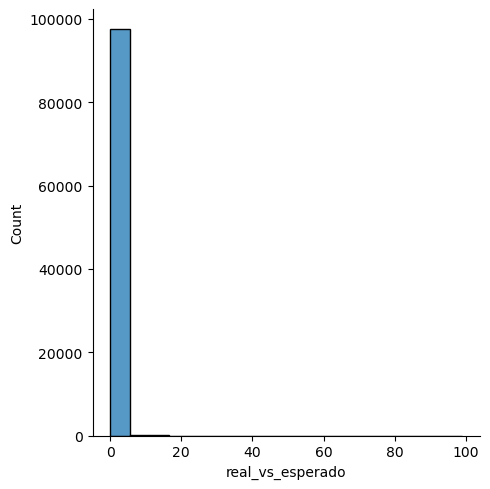

In [16]:
sns.displot(orders['real_vs_esperado'])

___

### b) `puntaje_de_compra`
     retorna un dataframe con
        order_id, es_cinco_estrellas, es_una_estrella, review_score

recordar del examen `DataFrame.apply()` o tmb se puede usar`Series.map()`


👉 We load the `reviews` for you

In [17]:
reviews = data['order_reviews'].copy()
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [18]:
reviews['es_cinco_estrellas'] = reviews['review_score'].apply(lambda x: 1 if x == 5 else 0)
reviews['es_una_estrella'] = reviews['review_score'].apply(lambda x: 1 if x == 1 else 0)

In [19]:
from olist.preprocess import review_score   
reviews = review_score(reviews)
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,es_cinco_estrellas,es_una_estrella
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,3,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,0,0
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,4,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,1,0
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,4,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,1,0
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,4,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,1,0
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,4,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,1,0


In [20]:
reviews = reviews.drop(columns=["review_comment_title", "review_comment_message", "review_creation_date", "review_answer_timestamp", "review_id"])

In [21]:
reviews

,order_id,review_score,es_cinco_estrellas,es_una_estrella
0,73fc7af87114b39712e6da79b0a377eb,3,0,0
1,a548910a1c6147796b98fdf73dbeba33,4,1,0
2,f9e4b658b201a9f2ecdecbb34bed034b,4,1,0
3,658677c97b385a9be170737859d3511b,4,1,0
4,8e6bfb81e283fa7e4f11123a3fb894f1,4,1,0
...,...,...,...,...
99219,2a8c23fee101d4d5662fa670396eb8da,4,1,0
99220,22ec9f0669f784db00fa86d035cf8602,4,1,0
99221,55d4004744368f5571d1f590031933e4,4,1,0
99222,7725825d039fc1f0ceb7635e3f7d9206,3,0,0


___

### c) `numero_de_productos`:
     retorna un dataframe con
        order_id, numero_de_productos (numero_de_productos_por_orden)

In [22]:
data.keys()

dict_keys(['sellers', 'product_category_name_translation', 'orders', 'order_items', 'tablon_primario', 'customers', 'geolocation', 'order_payments', 'order_reviews', 'products'])

In [23]:
order_items = data['order_items'].copy()
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [24]:
productos = data['products'].copy()
productos.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [25]:
from olist.preprocess import numero_de_productos
productos_por_orden = numero_de_productos(order_items, productos)
productos_por_orden


,order_id,number_of_products
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,1
98662,fffcd46ef2263f404302a634eb57f7eb,1
98663,fffce4705a9662cd70adb13d4a31832d,1
98664,fffe18544ffabc95dfada21779c9644f,1


___

### d) `numero_de_vendedores`:
     Retorna un dataframe con
        order_id, numero_de_vendedores (total de vendedores UNICOS !!! )

HINT!:
`pd.Series.nunique()`


In [26]:
from olist.preprocess import vendedores_unicos
vendedores = vendedores_unicos(order_items)
vendedores


,order_id,vendedores_unicos
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,1
98662,fffcd46ef2263f404302a634eb57f7eb,1
98663,fffce4705a9662cd70adb13d4a31832d,1
98664,fffe18544ffabc95dfada21779c9644f,1


___

### e) `calcular_precio_y_transporte`
     Returns a DataFrame with:
        order_id, precio, valor_transporte

recordar el agg en el groupby

In [27]:
from olist.preprocess import calcular_precio_y_transporte 
precio_y_transporte = calcular_precio_y_transporte(order_items, productos)
precio_y_transporte

,order_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14
...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99,43.41
98662,fffcd46ef2263f404302a634eb57f7eb,350.00,36.53
98663,fffce4705a9662cd70adb13d4a31832d,99.90,16.95
98664,fffe18544ffabc95dfada21779c9644f,55.99,8.72


___

### f) `distancia_al_cliente`

    Retorna un dataframe con
        order_id, distancia_al_cliente (distancia en kilometros)

usar `haversine_distance`

In [28]:
data.keys()

dict_keys(['sellers', 'product_category_name_translation', 'orders', 'order_items', 'tablon_primario', 'customers', 'geolocation', 'order_payments', 'order_reviews', 'products'])

In [29]:
sellers = data['sellers'].copy()
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [30]:
geolocation = data['geolocation'].copy()
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [31]:
customers = data['customers'].copy()
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [32]:
print(customers.columns)

Index(['customer_id                      ',
       'customer_unique_id               ', 'customer_zip_code_prefix ',
       'customer_city                  ', 'customer_state'],
      dtype='object')


In [33]:
customers.rename(columns=lambda x: x.strip(), inplace=True) # Remuevo espacios de las columnas.

In [34]:
from math import radians, sin, cos, asin, sqrt

def haversine_distance(lon1, lat1, lon2, lat2):
    """
    Computa distancia entre dos pares (lat, lng)
    Ver - (https://en.wikipedia.org/wiki/Haversine_formula)
    """
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    return 2 * 6371 * asin(sqrt(a))


In [35]:
# TIP 1:
# usar los datasets

# data['order_items']
# data['sellers']
# data['customers']


In [36]:
# TIP 2:
# usar el dataset de geolocalizacion
# Un zip code puede tener varias lat y lon. groupby puede ser usado con el metodo .first() para quedarte con el primero
# agroupa data['geolocation'] con ese metodo y crea un datset llamado geo
geo = geolocation.groupby('geolocation_zip_code_prefix').first().reset_index()
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1001,-23.549292,-46.633559,sao paulo,SP
1,1002,-23.548318,-46.635421,sao paulo,SP
2,1003,-23.549032,-46.635313,sao paulo,SP
3,1004,-23.550116,-46.635122,sao paulo,SP
4,1005,-23.549819,-46.635606,sao paulo,SP


In [37]:
# Solo usar columnas 'seller_id', 'seller_zip_code_prefix', 'geolocation_lat', 'geolocation_lng'
# Hago merge de sellers con geolocalizacion
sellers_geo = sellers.merge(geo, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix')
sellers_geo = sellers_geo[['seller_id', 'seller_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']]
sellers_geo.head()

,seller_id,seller_zip_code_prefix,geolocation_lat,geolocation_lng
0,3442f8959a84dea7ee197c632cb2df15,13023,-22.898536,-47.063125
1,e0eabded302882513ced4ea3eb0c7059,13023,-22.898536,-47.063125
2,d1b65fc7debc3361ea86b5f14c68d2e2,13844,-22.382941,-46.946641
3,ce3ad9de960102d0677a81f5d0bb7b2d,20031,-22.910641,-43.176510
4,1d2732ef8321502ee8488e8bed1ab8cd,20031,-22.910641,-43.176510


In [38]:
# Mergeo con buyers, usar solo de ese dataset ['customer_id', 'customer_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']
buyers_geo = customers.merge(geo, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')
buyers_geo = buyers_geo[['customer_id', 'customer_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']] # Pongo espacios porque en el df original están asi.
buyers_geo.head()

,customer_id,customer_zip_code_prefix,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,-20.509897,-47.397866
1,5dca924cc99eea2dc5ba40d11ec5dd0f,14409,-20.509897,-47.397866
2,661897d4968f1b59bfff74c7eb2eb4fc,14409,-20.509897,-47.397866
3,702b62324327ccba20f1be3465426437,14409,-20.509897,-47.397866
4,bdf997bae7ca819b0415f5174d6b4302,14409,-20.509897,-47.397866


In [39]:
# Mergeo en otra tabla compradores y vendedores
compradores_y_vendedores = customers.merge(sellers, left_on='customer_zip_code_prefix', right_on='seller_zip_code_prefix')
compradores_y_vendedores.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,8d46553a36e68f95350a200c12f8f2e2,13056,campinas,SP
1,cf7956da5b322ee09795506d6fcb238f,61891679419a7cd51f239be92ced8f81,13056,campinas,SP,8d46553a36e68f95350a200c12f8f2e2,13056,campinas,SP
2,a96d6b1da9c9aaa588d92a1a95e6707e,8056b915d8768eaf54c7f2da7d94687d,13056,campinas,SP,8d46553a36e68f95350a200c12f8f2e2,13056,campinas,SP
3,bf4de82f32ef651f28d27c81bcda7407,c0de68c9688745041397246020b26800,13056,campinas,SP,8d46553a36e68f95350a200c12f8f2e2,13056,campinas,SP
4,ede8227cb317f0794d3df6d6407c5d28,960a22e4bae4708a7db59d12d2d66ce4,13056,campinas,SP,8d46553a36e68f95350a200c12f8f2e2,13056,campinas,SP


In [40]:
# Mergear compradores_y_vendedores con buyers_geo
compradores_y_vendedores_con_buyers_geo = compradores_y_vendedores.merge(buyers_geo, left_on='seller_zip_code_prefix', right_on='customer_zip_code_prefix')
compradores_y_vendedores_con_buyers_geo.head()


,customer_id_x,customer_unique_id,customer_zip_code_prefix_x,customer_city,customer_state,seller_id,seller_zip_code_prefix,seller_city,seller_state,customer_id_y,customer_zip_code_prefix_y,geolocation_lat,geolocation_lng
0,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,8d46553a36e68f95350a200c12f8f2e2,13056,campinas,SP,4f2d8ab171c80ec8364f7c12e35b23ad,13056,-22.987222,-47.151073
1,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,8d46553a36e68f95350a200c12f8f2e2,13056,campinas,SP,cf7956da5b322ee09795506d6fcb238f,13056,-22.987222,-47.151073
2,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,8d46553a36e68f95350a200c12f8f2e2,13056,campinas,SP,a96d6b1da9c9aaa588d92a1a95e6707e,13056,-22.987222,-47.151073
3,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,8d46553a36e68f95350a200c12f8f2e2,13056,campinas,SP,bf4de82f32ef651f28d27c81bcda7407,13056,-22.987222,-47.151073
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,8d46553a36e68f95350a200c12f8f2e2,13056,campinas,SP,ede8227cb317f0794d3df6d6407c5d28,13056,-22.987222,-47.151073


In [41]:
# Removar na()
compradores_y_vendedores_con_buyers_geo = compradores_y_vendedores_con_buyers_geo.dropna()

In [42]:
data.keys()

dict_keys(['sellers', 'product_category_name_translation', 'orders', 'order_items', 'tablon_primario', 'customers', 'geolocation', 'order_payments', 'order_reviews', 'products'])

In [43]:
# Una orden puede tener muchos compradores retorna el promedio
promedio_ordenes_por_comprador = orders.groupby('order_id').agg({'customer_id': 'count'}).mean()
promedio_ordenes_por_comprador

customer_id    1.0
dtype: float64

In [44]:
from olist.preprocess import calcular_distancia_vendedor_comprador  

lon1 = buyers_geo["geolocation_lng"].tolist()
lat1 = buyers_geo["geolocation_lat"].tolist()

lon2 = sellers_geo["geolocation_lng"].tolist()
lat2 = sellers_geo["geolocation_lat"].tolist()


distancia_a_la_orden = calcular_distancia_vendedor_comprador(lon1, lat1, lon2, lat2)
distancia_a_la_orden

TypeError: must be real number, not list

In [ ]:
distancia_a_la_orden

NameError: name 'distancia_a_la_orden' is not defined

cual es la mediana de la distancia

In [ ]:
distancia_a_la_orden['distance_seller_customer'].describe()

count    98177.000000
mean       601.961534
std        596.877838
min          0.000000
25%        186.380313
50%        433.698770
75%        798.435455
max       8736.947618
Name: distance_seller_customer, dtype: float64

___

# Mergear todos los datasets excepto el de distancia

In [ ]:
customers.rename(columns=lambda x: x.strip(), inplace=True) # Remuevo espacios de las columnas.
orders.rename(columns=lambda x: x.strip(), inplace=True)
productos.rename(columns=lambda x: x.strip(), inplace=True)
vendedores.rename(columns=lambda x: x.strip(), inplace=True)
precio_y_transporte.rename(columns=lambda x: x.strip(), inplace=True)
# distancia_a_la_orden.rename(columns=lambda x: x.strip(), inplace=True)


In [ ]:
tablon_primario = orders.merge(reviews, on='order_id') \
    .merge(productos_por_orden, on='order_id') \
    .merge(vendedores, on='order_id') \
    .merge(precio_y_transporte, on='order_id')\
     #.merge(distancia_a_la_orden, on='order_id')
tablon_primario

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_delta,tiempo_de_espera,real_vs_esperado,review_score,es_cinco_estrellas,es_una_estrella,number_of_products,vendedores_unicos,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,8.436574,0.0,3,0,0,1,1,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,13.782037,0.0,3,0,0,1,1,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,9.394213,0.0,4,1,0,1,1,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,13.208750,0.0,4,1,0,1,1,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,2.873877,0.0,4,1,0,1,1,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98460,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,8.0,8.218009,0.0,4,1,0,1,1,72.00,13.08
98461,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.0,22.193727,0.0,3,0,0,1,1,174.90,20.10
98462,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,24.0,24.859421,0.0,4,1,0,1,1,205.99,65.02
98463,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0,17.086424,0.0,1,0,0,2,1,359.98,81.18


In [ ]:
tablon_primario.to_csv("data/tablon_primario.csv")